In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0372-0001.jpeg
pneumonia picture title: person1669_virus_2884.jpeg


Text(0.5, 1.0, 'Pneumonia')

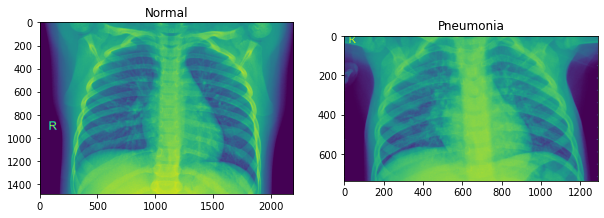

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [7]:
from common.src import models

cnn = models.CNNModel(patience_s=19)
cnn.create_model()
cnn.summary()

# Fit Model

In [8]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 20)

Epoch 1/20
163/163 [==============================] - 59s 363ms/step - loss: 0.3378 - tp: 4436.0000 - fp: 806.0000 - tn: 4410.0000 - fn: 780.0000 - accuracy: 0.8480 - precision: 0.8462 - recall: 0.8505 - auc: 0.9292 - val_loss: 0.5591 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8516
Epoch 2/20
163/163 [==============================] - 56s 341ms/step - loss: 0.2322 - tp: 4727.0000 - fp: 494.0000 - tn: 4722.0000 - fn: 489.0000 - accuracy: 0.9058 - precision: 0.9054 - recall: 0.9062 - auc: 0.9671 - val_loss: 0.4278 - val_tp: 228.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 76.0000 - val_accuracy: 0.7812 - val_precision: 0.8000 - val_recall: 0.7500 - val_auc: 0.8711
Epoch 3/20
163/163 [==============================] - 55s 340ms/step - loss: 0.2087 - tp: 4754.0000 - fp: 452.0000 - tn: 4764.0000 - fn: 462.0000 - accuracy: 0.9124 - precision: 0.9132 - recall: 0.9114 - auc: 0

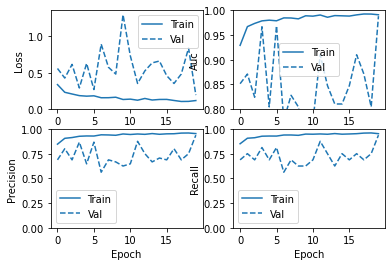

In [9]:
cnn.plot_history()

In [10]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.88      0.53      0.66       234
   PNEUMONIA       0.77      0.96      0.85       390

    accuracy                           0.80       624
   macro avg       0.83      0.74      0.76       624
weighted avg       0.81      0.80      0.78       624

None


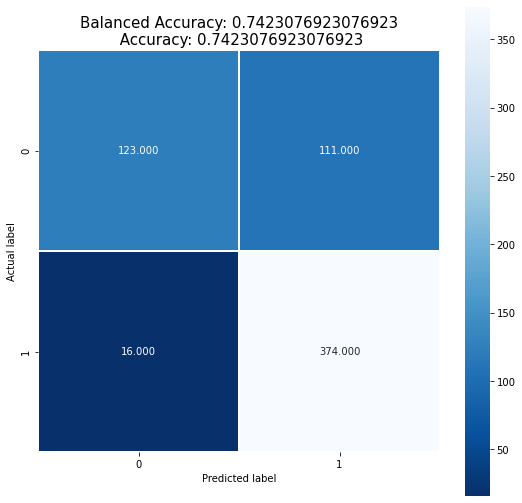

In [11]:
cnn.display_confusion_matrix(test_data_generator = test_set)